# Regret Detector
Calculate performance of the combined adversarial pNML scheme with regret detection recreating figure 3b.

In [7]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import numpy as np
import pandas as pd

from importlib import reload
os.sys.path.insert(0, '../src/')
import analyze_utilities
reload(analyze_utilities)

%run ./result_summary.ipynb

output_path = '../results/figures'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


baseline is 0.8763333333333333
['./../results/MNIST/mnist_lambda_003_no_attack\\no_attack']
Loading:['./../results/MNIST/mnist_lambda_003_no_attack\\no_attack\\results_mnist_adversarial_20190924_212847.json']
3000
Loading:['./../results/MNIST/mnist_lambda_003_beta_search\\mnist_lambda_003_bpda\\results_mnist_adversarial_20190924_213329.json']
Natural: 0.9633333333333334, PGD: nan, Adaptive: 0.9136666666666666, FPR: 0.021666666666666667 Risk: 0.171875, Beta 0.0
Natural: 0.9666666666666667, PGD: nan, Adaptive: 0.9063333333333333, FPR: 0.016666666666666666 Risk: 0.1875, Beta 0.0
Natural: 0.9713333333333334, PGD: nan, Adaptive: 0.9003333333333333, FPR: 0.010333333333333333 Risk: 0.203125, Beta 0.0
Natural: 0.974, PGD: nan, Adaptive: 0.8953333333333333, FPR: 0.005666666666666667 Risk: 0.21875, Beta 0.0
Natural: 0.9756666666666667, PGD: nan, Adaptive: 0.891, FPR: 0.0023333333333333335 Risk: 0.234375, Beta 0.0
Natural: 0.976, PGD: nan, Adaptive: 0.8863333333333333, FPR: 0.0016666666666666668 

Natural: 0.976, PGD: nan, Adaptive: 0.8746666666666667, FPR: 0.0 Risk: 0.578125, Beta 0.5
Natural: 0.976, PGD: nan, Adaptive: 0.8743333333333333, FPR: 0.0 Risk: 0.59375, Beta 0.5
Natural: 0.976, PGD: nan, Adaptive: 0.874, FPR: 0.0 Risk: 0.625, Beta 0.5
Natural: 0.976, PGD: nan, Adaptive: 0.8736666666666667, FPR: 0.0 Risk: 0.671875, Beta 0.5
Natural: 0.976, PGD: nan, Adaptive: 0.8733333333333333, FPR: 0.0 Risk: 0.75, Beta 0.5
Loading:['./../results/MNIST/mnist_lambda_003_beta_search\\mnist_adversarial_results_20190924_183904\\results_mnist_adversarial_20190924_183904.json']
Natural: 0.9633333333333334, PGD: nan, Adaptive: 0.9836666666666667, FPR: 0.021666666666666667 Risk: 0.171875, Beta 1.0
Natural: 0.9666666666666667, PGD: nan, Adaptive: 0.9813333333333333, FPR: 0.016666666666666666 Risk: 0.1875, Beta 1.0
Natural: 0.9713333333333334, PGD: nan, Adaptive: 0.9796666666666667, FPR: 0.010333333333333333 Risk: 0.203125, Beta 1.0
Natural: 0.974, PGD: nan, Adaptive: 0.9783333333333334, FPR: 0

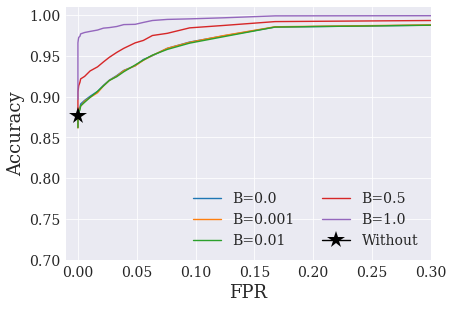

<Figure size 460.8x316.8 with 0 Axes>

<Figure size 460.8x316.8 with 0 Axes>

<Figure size 460.8x316.8 with 0 Axes>

<Figure size 460.8x316.8 with 0 Axes>

In [32]:
def adv_risk_detector(natural_results_path, adaptive_results_path_l, pgd_results_path=None, bpda_results_path=None, idx=None, baseline_df=None):    
#     results_dict_natural = analyze_utilities.load_dict_from_file_list(natural_results_path)
#     nml_df_natural = analyze_utilities.result_dict_to_nml_df(results_dict_natural)
    print(natural_results_path)
    nml_df_natural,_,_,statistic_natural_df = analyze_utilities.load_results_to_df_with_params(natural_results_path, idx=idx, flag_return_res_df=True)
    print(len(nml_df_natural))
    if pgd_results_path is not None:
        results_dict_pgd = analyze_utilities.load_dict_from_file_list(pgd_results_path)
        nml_df_pgd = analyze_utilities.result_dict_to_nml_df(results_dict_pgd)
        statistic_pgd_df = analyze_utilities.load_results_to_df_with_params(pgd_results_path, idx=idx)
    
    if bpda_results_path is not None:
        results_dict_bpda = analyze_utilities.load_dict_from_file_list(bpda_results_path)
        nml_df_bpda = analyze_utilities.result_dict_to_nml_df(results_dict_bpda)
        statistic_pgd_df = analyze_utilities.load_results_to_df_with_params(bpda_results_path, idx=idx)

    min_risk_th = 0
    max_risk_th = 1.25
    risk_steps = 80
    risk_th_range = np.arange(min_risk_th, max_risk_th, float(max_risk_th - min_risk_th)/risk_steps)
    statistics_df = pd.DataFrame(columns=['lambda','beta','risk_th','acc','adaptive_acc', 'pgd_acc'])

    for j, adaptive_results_path in enumerate(adaptive_results_path_l): 
        plt.figure()
        nml_df_adaptive,_,_,statistic_adaptive_df = analyze_utilities.load_results_to_df_with_params([adaptive_results_path], idx=idx, flag_return_res_df=True)
        # statistics_df = pd.concat([statistics_df, statistic_comb_df], ignore_index=False, sort=False)
        for iter, risk_th in enumerate(risk_th_range):
            statistics_detector_natural = analyze_utilities.create_adv_detector_df(nml_df_natural, risk_th, False, idx=idx)
            statistics_detector_adaptive = analyze_utilities.create_adv_detector_df(nml_df_adaptive, risk_th, True, idx=idx)
            if pgd_results_path is not None:
                statistics_detector_pgd = analyze_utilities.create_adv_detector_df(nml_df_pgd, risk_th, True, idx=idx)
            if bpda_results_path is not None:
                statistics_detector_bpda = analyze_utilities.create_adv_detector_df(nml_df_bpda, risk_th, True, idx=idx)
#             print(statistic_adaptive_df)
            statistics_df.loc[iter, 'lambda'] = float(statistic_adaptive_df.loc['eps','nml'])
            statistics_df.loc[iter, 'beta'] = float(statistic_adaptive_df.loc['beta','nml'])
            statistics_df.loc[iter, 'risk_th'] = float(statistics_detector_natural.loc['risk_th'])
            statistics_df.loc[iter, 'acc'] = float(statistics_detector_natural.loc['acc'])
            statistics_df.loc[iter, 'FPR'] = float(statistics_detector_natural.loc['FPR'])
            statistics_df.loc[iter, 'adaptive_acc'] = float(statistics_detector_adaptive.loc['acc'])
            if pgd_results_path is not None:
                statistics_df.loc[iter, 'pgd_acc'] = float(statistics_detector_pgd.loc['acc'])
            if bpda_results_path is not None:
                statistics_df.loc[iter, 'bpda_acc'] = float(statistics_detector_bpda.loc['acc'])
            if iter!=0:
                if statistics_df.loc[iter-1, 'acc'] > (statistic_natural_df.loc['acc','nml']-0.015) \
                                        and statistics_df.loc[iter, 'adaptive_acc'] < statistics_df.loc[iter-1, 'adaptive_acc']:
                    print("Natural: {}, PGD: {}, Adaptive: {}, FPR: {} Risk: {}, Beta {}".format(statistics_df.loc[iter-1, 'acc'], \
                                                                               statistics_df.loc[iter-1, 'pgd_acc'], \
                                                                               statistics_df.loc[iter-1, 'adaptive_acc'],\
                                                                                statistics_df.loc[iter-1, 'FPR'],
                                                                               statistics_df.loc[iter-1, 'risk_th'],
                                                                               statistics_df.loc[iter-1, 'beta']))                
        #     print(statistics_df)
        plt.figure(1)
        l2 = plt.plot(statistics_df.FPR, statistics_df.adaptive_acc, label="B={}".format(statistics_df.loc[0, 'beta']))
        
    if baseline_df is not None:
        plt.plot(0, baseline_df.loc["acc", "erm"], color='k', marker='*', label='Without', markersize=18)        
    plt_properties(statistics_df)
    plt.show()
def plt_properties(statistics_df):
    plt.legend(loc='lower right',ncol=2,fontsize=14)
    plt.xlabel("FPR")
    plt.ylabel("Accuracy")
    is_plot_title=False
    plt.title('Refinement Lambda: {}'.format(statistics_df.loc[0, 'lambda'])) if is_plot_title else None
    axes = plt.gca()
    axes.set_ylim([0.70, 1.01])
    axes.set_xlim([-0.01, 0.3])
    plt.savefig(os.path.join(output_path, 'fig_adv_detector.pdf'),
                dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    

mnist_lambda_003_beta_search = './../results/MNIST/mnist_lambda_003_beta_search'
mnist_lambda_003_no_attack = './../results/MNIST/mnist_lambda_003_no_attack'

# mnist_lambda_01_no_attack = './../results/MNIST/mnist_lambda_01_no_attack'   # [Original\PNML Accuracy] = [0.9832\0.9831]
# mnist_lambda_01_beta_search = './../results/MNIST/mnist_lambda_01_beta_search'
natural_results_path_l, adaptive_results_path_l = analyze_utilities.create_list_of_corresponding_results_by_params(\
                                               mnist_lambda_003_no_attack, mnist_lambda_003_beta_search, paths_to_res_file_flag=False)
adaptive_results_path_l =[adaptive_results_path_l[0][-1]] + (adaptive_results_path_l[0][0:-2])[0::2] + [adaptive_results_path_l[0][-2]]
# adaptive_results_path_l = adaptive_results_path_l[0]
mnist_pgd_pgd_fgsm_all = ['./../results/paper/MNIST/mnist_adversarial_results_20190802_151544/results_mnist_adversarial_20190802_151544.json']  # [Original\PNML Accuracy] = [0.9051\0.9519]
_, baseline_df = analyze_utilities.load_results_to_df(mnist_pgd_pgd_fgsm_all, idx=range(0,3000))
print("baseline is {}".format(baseline_df.loc["acc", "erm"]))
adv_risk_detector(natural_results_path_l, adaptive_results_path_l, None, None, idx=range(0,3000), baseline_df=baseline_df)
    